**Import Library**

melakukan import library yang dibutuhkan untuk proses modeling

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
from google.colab import files
upload = files.upload()

Saving labelled_reviews.csv to labelled_reviews.csv


**Load Dataset**

melakukan load dataset yang telah diberi label dari proses sebelumnya

In [16]:
data = pd.read_csv('labelled_reviews.csv')
data.head(10)

comment = data['Comment']
sentiment = data['Sentiment']

**Split Dataset**

split dataset menjadi data training dan data testing dengan: 80% training, 20% testing

In [17]:
x_train, x_test, y_train, y_test = train_test_split(comment, sentiment, test_size=0.2, random_state=42)

In [38]:
print("Number of x_train : ", x_train.shape[0])
print("Number of x_test : ", y_test.shape[0])

Number of x_train :  14040
Number of x_test :  3510


**Initialize and fit TfidfVectorizer**

Vectorisasi adalah proses mengubah teks atau data non-numerik menjadi representasi numerik. Agar data dapat dibaca oleh model machine learning.

In [19]:
vectorizer_tfidf = TfidfVectorizer(min_df=0.01, max_df=0.6)

In [33]:
# transform and fit training and testing dataset
x_train_tfidf = vectorizer_tfidf.fit_transform(x_train)
x_test_tfidf = vectorizer_tfidf.transform(x_test)

**Train Naive Bayes classifier**

melakukan training dengan algoritma Naive Bayes

In [31]:
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_tfidf, y_train)

MultinomialNB()

**Predict on the testing set**

melakukan uji coba menggunakan data testing

In [40]:
y_pred = naive_bayes.predict(x_test_tfidf)

**Evaluate the Model**

In [75]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_matrix)

Accuracy: 0.8589743589743589
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.03       478
           1       0.00      0.00      0.00        24
           2       0.86      1.00      0.92      3008

    accuracy                           0.86      3510
   macro avg       0.62      0.34      0.32      3510
weighted avg       0.87      0.86      0.80      3510

Confusion Matrix:
 <function confusion_matrix at 0x7f0f7a240670>


**Visualisasi Data**

Histogram sentiment

Keterangan sentiment:


*   0 : Negative
*   1 : Netral
*   2 : Positive


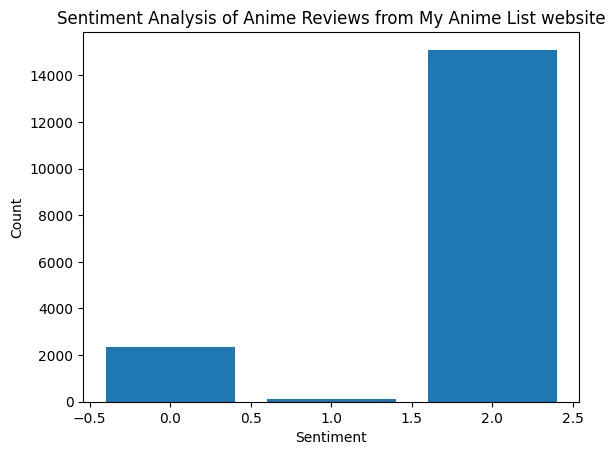

In [69]:
sentiment_counts = data['Sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title("Sentiment Analysis of Anime Reviews from My Anime List website")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


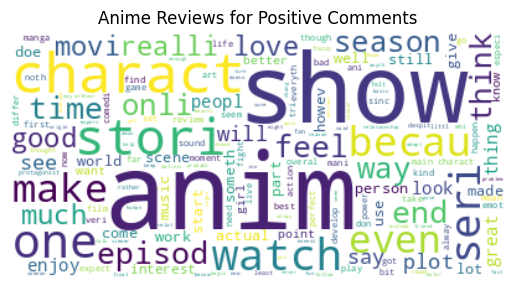

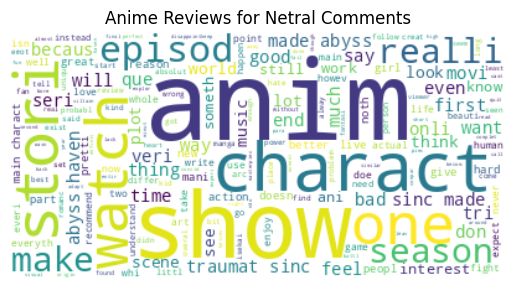

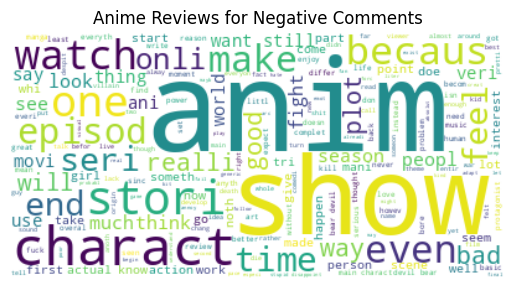

In [60]:
# Visualization anime reviews for positive comments
positive_comments = data[data['Sentiment'] == 2]['Comment']
wordcloud = WordCloud(background_color='white').generate(' '.join(positive_comments))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Anime Reviews for Positive Comments")
plt.axis("off")
plt.show()

# Visualization anime reviews for netral comments
netral_comments = data[data['Sentiment'] == 1]['Comment']
wordcloud = WordCloud(background_color='white').generate(' '.join(netral_comments))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Anime Reviews for Netral Comments")
plt.axis("off")
plt.show()

# Visualization anime reviews for negative comments
negative_comments = data[data['Sentiment'] == 0]['Comment']
wordcloud = WordCloud(background_color='white').generate(' '.join(negative_comments))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Anime Reviews for Negative Comments")
plt.axis("off")
plt.show()

**Save Model**

In [72]:
!pip install joblib

In [77]:
import joblib

# save model
joblib.dump(naive_bayes, 'MALSentimentAnalyzerModel.joblib')

['MALSentimentAnalyzerModel.joblib']

In [78]:
# test load model
model = joblib.load('MALSentimentAnalyzerModel.joblib')
y_predict = model.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy )

Accuracy:  0.8589743589743589
